# Probl√®me Monty Hall et Simulation de Distributions 

## Probl√®me *Monty Hall* avec Simulation Monte-Carlo

Il existe un casse-t√™te probabiliste [*le probl√®me de Monty Hall*](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_Monty_Hall) aussi appel√© *paradoxe de Monty Hall*, inspir√© du jeu t√©l√©vis√© am√©ricain [*Let's Make a Deal*](https://fr.wikipedia.org/wiki/Let%27s_Make_a_Deal) pr√©sent√© par [Monty Hall](https://fr.wikipedia.org/wiki/Monty_Hall). 

Le probl√®me peut √™tre formul√© de la fa√ßon suivante: 

La personne est plac√©e devant trois portes ferm√©es.

<img src="img/3-doors.png" alt="Trois portes ferm√©es" width="400px">

Derri√®re une porte se trouve un prix et derri√®re deux autres une ch√®vre. 

La personne choisit une porte qui reste ferm√©e :

<img src="img/choice-1.png" alt="1er choix d'une porte" width="400px">

Le.a pr√©sentateur.rice, qui sait ce qu'il y a derri√®re chaque porte, ouvre une des portes qui restent derri√®re laquelle se trouve une ch√®vre :

<img src="img/goat-revealed.png" alt="Une ch√®vre est d√©voil√©e derri√®re une des portes" width="400px">

La personne a alors le choix : soit ouvrir la porte choisie initiallement, soit ouvrir une autre porte (i.e. changer son avis).  
<img src="img/question.png" alt="Quelle porte choisir?" width="620px">

> A la personne int√©r√™t √† changer son choix initial ? 

> Quelles sont ses chances de gagner le prix en agissant au mieux ?

<img style="float: right;" src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2018/03/portrait-of-marilyn-vos-savant.jpg" alt="Marilyn Vos Savant's portrait, source: allthatsinteresting.com, under Wikimedia Commons license" width="150px"> Ce probl√®me est devenu connu par le grand public gr√¢ce √† [Marilyn vos Savant](https://fr.wikipedia.org/wiki/Marilyn_vos_Savant), une femme poss√©dant l'un des quotients intellectuels les plus √©lev√©s au monde, indiqu√© par le *Guiness Book of records*. Elle publie l'√©nonc√© et sa r√©ponse dans sa rubrique *Ask Marilyn* de Parade Magazine en septembre 1990 :

*Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, " Do you want to pick door No. 2? " Is it to your advantage to switch your choice?*

Afin de r√©pondre √† cette question, nous allons d'abord approcher ce probl√®me de point de vue probabiliste, et ensuite nous allons faire une simulation.

### Approche probabiliste

Soit $A = \text{\{la personne gagne le prix\}}$ et $B = \text{\{la personne a choisi la bonne porte\}}$. Alors, selon la formule de probabilit√© totale :

$$\mathbb{P}(A) = \mathbb{P}(A|B)\times \mathbb{P}(B) + \mathbb{P}(A|\bar{B})\times \mathbb{P}(\bar{B})$$

Notons que la probabilit√© que la personne a choisi la bonne porte, $\mathbb{P}(B) = \frac{1}{3}$ lorsqu'il y a un seul prix derri√®re 3 portes. Et $\mathbb{P}(\bar{B}) = \frac{2}{3}$. Ainsi, nous obtenons : 

$$\mathbb{P}(A) = \mathbb{P}(A|B)\times \mathbb{P}(B) + \mathbb{P}(A|\bar{B})\times \mathbb{P}(\bar{B}) = \mathbb{P}(A|B)\times \frac{1}{3} + \mathbb{P}(A|\bar{B})\times \frac{2}{3}$$

Consid√©rons le cas, o√π **la personne garde son choix initial** :

* la probabilit√© de gagner sachant que la porte choisie est bonne est 1, i.e. $\mathbb{P}(A|B) = 1$
* la probabilit√© de gagner sachant que la porte choisie n'est pas bonne est 0, i.e. $\mathbb{P}(A|\bar{B}) = 0$

Dans ce cas l√† : 
$$\mathbb{P}(A) = \mathbb{P}(A|B)\times \mathbb{P}(B) + \mathbb{P}(A|\bar{B})\times \mathbb{P}(\bar{B}) = \mathbb{P}(A|B)\times \frac{1}{3} + \mathbb{P}(A|\bar{B})\times \frac{2}{3} = 1\times \frac{1}{3} + 0\times \frac{2}{3} = \mathbf{\frac{1}{3}}$$

<img src="img/tree-remain-initial-choice.png" alt="Arbre des probabilit√©s si la strat√©gie est de garder le choix initial" width="620px">



Maintenant, consid√©rons le cas o√π **la personne change son avis** :

* si la personne a choisi initialement une bonne porte, la probabilit√© de gagner si elle change par la suite est 0, i.e. $\mathbb{P}(A|B) = 0$
* si la personne a choisi initialement une bonne porte, la probabilit√© de gagner si elle change par la suite est 1, i.e. $\mathbb{P}(A|\hat{B}) = 1$.

Donc : 
$$\mathbb{P}(A) = \mathbb{P}(A|B)\times \mathbb{P}(B) + \mathbb{P}(A|\bar{B})\times \mathbb{P}(\bar{B}) = \mathbb{P}(A|B)\times \frac{1}{3} + \mathbb{P}(A|\bar{B})\times \frac{2}{3} = 0\times \frac{1}{3} + 1\times \frac{2}{3} = \mathbf{\frac{2}{3}}$$

<img src="img/tree.png" alt="Arbre des probabilit√©s si la strat√©gie est de changer le choix initial" width="620px">

Autrement dit, initialement les probabilit√©s de gagner se r√©partissent de la fa√ßon suivante :

<img src="img/doors-prob.png" alt="Probabilit√© de gagner initialement" width="400px">

Une fois qu'une ch√®vre est d√©voil√©e, la probabilit√© de gagner se r√©partit de la fa√ßon suivante :

<img src="img/doors-prob-goat.png" alt="Probabilit√© de gagner initialement" width="400px">


### Simulation

V√©rifions le raisonement ci-dessous avec une simulation. 

Nous allons avoir besoin de g√©n√©rateur de pseudo-al√©atoire. Nous pouvons utiliser le module [`random`](https://docs.python.org/3/library/random.html).

In [1]:
# chargement du module de g√©n√©rateur de nombre pseudo-al√©atoires
from random import randint, choice 

Afin de choisir un nombre entier $N$ compris entre $a$ et $b$ (i.e. $a \leq N \leq b$), on peut utiliser la fonction [`random.randint(a, b)`](https://docs.python.org/3/library/random.html#random.randint), e.g. :

In [2]:
# choisir un nombre entre 1 et 6
randint(1, 6)

2

Afin de choisi un √©l√©ment d'une s√©quence `s` d'une mani√®re al√©atoire, on peut utiliser la fonction [`random.choice()`](https://docs.python.org/3/library/random.html#random.choice), e.g.:

In [3]:
# liste (s√©quence d'√©l√©ments)
s = ['a', 'b', 'c']
# choisir un √©l√©ment
choice(s)

'a'

#### Exemple de simulation (lancements d'un d√©)

Imaginons que le probl√®me trait√© est le suivant. Nous lancons un d√© √©quilibr√© 6 fois. Ce qui nous int√©resse est la probabilit√© d'avoir 6 valeurs diff√©rentes lors de ces lancements. 

De point de vue probabiliste, cette probabilit√© est √©gale √† :

$$\frac{6}{6} \times \frac{5}{6} \times \frac{4}{6} \times \frac{3}{6} \times \frac{2}{6} \times \frac{1}{6} = \frac{6!}{6^6} = 0.015$$

In [4]:
import math 
# calculons la valeur pr√©c√©dente
math.factorial(6) / 6**6

0.015432098765432098

Passons √† la simulation en identifiant des points suivants :

* *variables √† controler* : les r√©sultats de 6 lancements d'un d√©
* *distribution de chaque variable* : uniforme discr√®te, 1/6 pour chaque c√¥t√© :
|1|2|3|4|5|6|
|--|--|--|--|--|--|
|$$\frac{1}{6}$$|$$\frac{1}{6}$$|$$\frac{1}{6}$$|$$\frac{1}{6}$$|$$\frac{1}{6}$$|$$\frac{1}{6}$$|
* *boucle* (√† r√©p√©ter autant de fois que le nombre d'essais) :
    - *r√©alisation d'une variable al√©atoire* : un lancement d'un d√©
    - *calcul d√©terministe du r√©sultat* : ajout de r√©sultat de la r√©alisation dans un ensemble (`set`). Si la taille de cet ensemble au bout de 6 lancement est √©gale √† 6 (nombre de lancement), donc tous les lancements ont eu des r√©sultats diff√©rents. Si c'est le cas, on incr√©mente la valeur de variable-compteur de succ√®s. 
* *Agr√©gation de r√©sultat* : diviser le nombre de succ√®s par le nombre d'essais pour avoir la probabilit√©

In [5]:
# nombre d'essais
trials = 1000000
# initialisation du compteur de succ√®s 
success = 0
# nombre de lancement de d√©
rolls = 6
# r√©p√©titions selon le nombre d'essais
for i in range(trials):
    # ensemble de r√©sultats uniques lors de lancements
    faces = set() 
    # pour chaque lancement 
    for j in range(rolls):
        # r√©alisation d'une distribution uniforme sur [1, 6]
        res = randint(1, 6)
        # ajout de r√©sultat dans l'ensemble faces
        faces.add(res)
    # test si le nombre de valeurs dans faces est √©gale √† nombre de lancements de d√© 
    if len(faces) == rolls :
        # incr√©mente le succ√®s
        success += 1
# calcul de la probabilit√© du succ√®s
prob = success / trials
# affichage du r√©sultat
print(f"La probabilit√© du succ√®s : {prob}")

La probabilit√© du succ√®s : 0.015297


Notons qu'on obtient le r√©sultat conforme avec la valeur th√©orique.

#### Application au probl√®me de Monty Hall 

Soit `doors = ["A", "B", "C"]` une liste contenant les options pour les portes. 
Ecrivez la fonction `simulation_monty_hall(trials)` qui prend en param√®tre le nombre de runs √† faire (`trials`) et effectue des op√©rations suivantes : 

* choisit la porte gagnante d'une mani√®re al√©atoire √† partir de `doors`, 
* choisit la porte "choix initial" de la personne d'une mani√®re al√©atoire √† partir de `doors`, 
* agr√®ge les r√©sultats de victoire en choisissant soit la porte initiale, soit en changeant la porte une fois une ch√®vre d√©voil√©e. 
* calcule le r√©sultat de r√©ussite de chacune de strat√©gies : si le choix initial est gagnant, alors c'est la strat√©gie de garder le choix initial qui gagne, sinon c'est la strat√©gie de changer la porte qui gagne.

```
def simulation_monty_hall(trials=10000):
    """
    Simulation du probl√®me de Monty Hall. La porte gagnante et la porte choisie initialement par l'utilisateur 
    sont choisies d'une mani√®re al√©atoire.
    
    Keyword arguments:
    trials --  nombre de simulations (essais). Par d√©faut, 10000 
    
    Return:
    un dictionnaire contenant le nombre de fois que la porte choisie initialement gagne (initial) et 
    le nombre de fois o√π la strat√©gie de changer la porte gagne (change)
    """
```

In [6]:
## Donnez votre code ici
def simulation_monty_hall(trials=10000):
    doors = ["A", "B", "C"]
    res = {"garder" : 0, "changer" : 0}
    
    for i in range (trials):
        windoor = choice(doors)
        initdoor = choice(doors)
        if initdoor == windoor:
            res["garder"] += 1
        else:
            res["changer"] += 1
    return res

Faites les simulations pour le nombre de runs 10, 100, 1000, 10000, 50000, 100000, 1000000. Afficher les statistiques suivantes :
- le nombre de runs
- le nombre de fois la strat√©gie de garder le choix initial (strat√©gie 1) gagne
- le nombre de fois la strat√©gie de changer (strat√©gie 2) gagne 
- la probabilit√© de gagner avec la strat√©gie 1 
- la probabilit√© de gagner avec la strat√©gie 2 

Commentez.

In [7]:
## Donnez votre code ici
runs = 1000000
res = simulation_monty_hall(runs)
print(f"Runs : {runs}")
print(f"Strat√©gie 1 : {res['garder']} wins")
print(f"Strat√©gie 2 : {res['changer']} wins")
print(f"Probabilit√© de victoire strat√©gie 1 : {res['garder']/(res['garder']+res['changer'])}")
print(f"Probabilit√© de victoire strat√©gie 2 : {res['changer']/(res['garder']+res['changer'])}")


Runs : 1000000
Strat√©gie 1 : 332687 wins
Strat√©gie 2 : 667313 wins
Probabilit√© de victoire strat√©gie 1 : 0.332687
Probabilit√© de victoire strat√©gie 2 : 0.667313


**Conclusions / commentaires :** <span style="color:red">Donnez vos commentaires ici</span>

Le r√©sultat est assez contre-intuitif : La strat√©gie de changer de porte donne une probabilit√© de victoire d‚Äôenviron 2/3, alors que garder son choix initial ne donne qu‚Äôenviron 1/3. C‚Äôest contre-intuitif car on pourrait penser que, apr√®s qu‚Äôune porte est ouverte, il ne reste qu‚Äôun choix sur deux.

En fait, le pr√©sentateur nous donne une information lorsqu'il ouvre la porte ne contenant pas le prix.

Conclusion :
‚Üí Il vaut mieux changer de porte.

## Simulation des lois

**Objectifs :**

* Comprendre la g√©n√©ration de pseudo-al√©atoires
* Transformer la distribution uniforme sur $[0, 1]$ en une distribution plus complexe.* Transformer la distribution uniforme sur $[0, 1]$ en une distribution plus complexe.

### Distribution uniforme

Nous √©tudierons les g√©n√©rateurs suivants :
1. le *g√©n√©rateur de Von Neumann*, introduit en 1946, qui consiste √† √©lever un nombre au carr√© puis √† retirer le premier et le dernier chiffre, et √† it√©rer cette op√©ration ;
2. un *g√©n√©rateur √† congruence lin√©aire usuel*, dit *Standard Minimal*,
3. un *g√©n√©rateur √† congruence lin√©aire avec un choix diff√©rent des param√®tres*, dit *RANDU*.

Le principe de ces g√©n√©rateurs est d√©crit ci-apr√®s.

Nous n'allons pas √©tudier le *g√©n√©rateur Mersenne-Twister*, qui est le g√©n√©rateur par d√©faut de `R` et [`Python`](https://docs.python.org/3/library/random.html). Il peut √©galement √™tre trouv√© chez `numpy`,  notamment la classe [`numpy.random.MT19937(seed=None)`](https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html). En `numpy`, le g√©n√©rateur principal est [Permuted Congruential Generator (64-bit, PCG64), `numpy.random.PCG64(seed=None)`](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64) 

Le g√©n√©rateurs Mersenne-Twister ne sera pas d√©crit
ici. Nous renvoyons √† [[1]](https://fr.wikipedia.org/wiki/Mersenne_Twister) et [[2]](https://link.springer.com/chapter/10.1007/978-3-540-85912-3_26) pour une description d√©taill√©e.

**Table de mati√®res :**

- [D√©finition d'un g√©n√©rateur al√©atoire](#1)
    - [D√©finition](#1.1)
    - [G√©n√©rateurs pseudo-al√©atoires √©tudi√©s](#1.2)
        - [G√©n√©rateur de Von Neumann](#von-neumann)
        - [G√©n√©rateurs √† congruence lin√©aires](#congruence)
            - [Standard Minimal](#std-min)
            - [RANDU](#randu)
        - [Graine des g√©n√©rateurs](#graine)
    - [Qualit√© de la s√©quence produite par un g√©n√©rateur pseudo-al√©atoire](#tests)

<a name='1'></a>
#### D√©finition d'un g√©n√©rateur al√©atoire

Dans beaucoup d‚Äôapplications informatiques (la simulation, les jeux vid√©os, la cryptographie, etc.), il est n√©cessaire de tirer des nombres au hasard pour initialiser diff√©rents algorithmes. Pour cela, on utilise ce qu‚Äôon appelle des nombres **pseudo-al√©atoires** pour souligner leur diff√©rence par rapport aux v√©ritables suites de variables al√©atoires ind√©pendantes identiquement distribu√©es. Nous nous int√©ressons ici √† quelques m√©thodes classiquement utilis√©es pour g√©n√©rer des nombres pseudo-al√©atoires (pour plus de d√©tails, se r√©f√©rer par exemple √† [[3]](http://math.univ-lyon1.fr/~jberard/genunif-www.pdf)). Plus pr√©cis√©ment, il existe deux types de g√©n√©rateurs :
* les g√©n√©rateurs *√† sorties impr√©dictibles* : ils g√©n√®rent des nombres pseudo-al√©atoires dont on ne peut pas pr√©voir la valeur,
* les g√©n√©rateurs *√† sorties pr√©dictibles* : dans ces g√©n√©rateurs, on initialise (on dit *nourrir*) l‚Äôalgorithme √† partir d‚Äôun nombre connu appel√© **graine** et le g√©n√©rateur produira toujours la m√™me suite s'il est initialis√© avec la m√™me valeur.

Notons que la plupart des algorithmes de g√©n√©ration de nombres pseudo-al√©atoires essaient de produire des sorties qui sont *uniform√©ment distribu√©es* ($\mathcal{U}([0,1])$). Ceci est expliqu√© par le fait qu'√† partir d'une suite uniforme, il existe des m√©thodes pour g√©n√©rer des suites de nombres selon les principales lois de probabilit√© (e.g., *la m√©thode de la transform√©e inverse*). 

[Vid√©o sur la g√©n√©ration de nombre al√©atoires et psudo-al√©atoires par Khan Academy](https://www.khanacademy.org/computing/computer-science/cryptography/crypt/v/random-vs-pseudorandom-number-generators)

<a name='1.1'></a>
##### D√©finition

<div class="alert alert-block alert-info">
Un <b>g√©n√©rateur pseudo-al√©atoire</b> est une structure $G = (S, \mu, f, U, g)$ avec :

* $S$ un (grand) ensemble fini d‚Äô√©tats,
* $\mu$ est une distribution de probabilit√© sur $S$ (le plus souvent la loi uniforme),
* $f : S \rightarrow S$ est la fonction de transition utilis√©e pour passer d'un √©tat $S_i$ au suivant $S_{i+1}$.
* $U$ est l'ensemble image de la fonction $g : S \rightarrow U$ qui fait correspondre √† chaque √©tat $S_i$ un √©chantillon de $U$. Tr√®s classiquement, on va avoir $U = [0, 1]$ pour une loi uniforme sur $[0,1]$.
</div>

Le g√©n√©rateur fonctionne donc en it√©rant la fonction $f$ √† partir d'un √©tat initial $S_0$ appel√© **graine** (en. **seed**), choisi par l‚Äôutilisateur. En notant $(X_n)_{n\geq1}$ la liste des valeurs successives produites par le g√©n√©rateur, on a la relation $X_n = g(\underbrace{f\circ ... \circ f(S_0)}_{n\text{ fois}})$ o√π $f$ est appliqu√©e $n$ fois.

**Remarque :** La notation $g \circ f$ se lit "$g$ rond $f$" ou "$g$ suivi de $f$" et correspond √† la *composition de fonctions* aussi appel√©e *composition d'applications*, i.e. $h = g \circ f$ telle que $h(x) = g(f(x))$.

En pratique, le g√©n√©rateur ne garde en m√©moire que l'√©tat courant $S_n \in S$, initialis√© √† $S_0$ et mis √† jour lors de chaque appel de $f : S_n = f(S_{n-1})$, la valeur renvoy√©e √©tant √©gale √† $X_n = g(S_n)$.

Le choix de la graine $S_0$ d√©termine donc enti√®rement la suite de nombres pseudo-al√©atoires produite par le g√©n√©rateur car une fois cette graine choisie, le comportement de la suite est compl√©tement **d√©terministe**.

<a name='1.2'></a>
##### G√©n√©rateurs pseudo-al√©atoires √©tudi√©s

<a name='von-neumann'></a>
###### G√©n√©rateur de Von Neumann

<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/JohnvonNeumann-LosAlamos.jpg/220px-JohnvonNeumann-LosAlamos.jpg" alt="John von Neumann's portrait, source: wikipedia" width="150px"> En 1949, John von Neumann propose un g√©n√©rateur pseudo-al√©atoire dit *la m√©thode middle-square* (carr√© m√©dian). La m√©thode utilise des nombres comportant 10 chiffres.  

La fonction $f$ consiste √† √©lever le nombre $S_n$ au carr√© et √† √¥ter les premiers et les derniers chiffres en prenant les chiffres au milieu, de mani√®re sym√©trique, de sorte √† ce que le nombre obtenu soit compris entre 0 et 9999. 

**Exemples :**

Soit $S_n = 1315$. Ce nombre est compos√© de $k = 4$ chiffres. 

1. $1315^2 = 1729225$. Notons que $1729225$ est compos√© de 7 chiffres, ce qui ne correspond pas √† $2*k = 8$. On peut donc ajouter un 0 au d√©but, ce qui va donner "**0**1729225"
2. on r√©cup√®re les 4 chiffres du milieu : $01\underbrace{7292}_{milieu}25$

Donc $S_{n+1} = 7292$.

Soit $S_n = 3432, k=4$ : 

1. $3432^2 = 11778624$, o√π le nombre de chiffres est $8 = 2k$
2. on r√©cup√®re les 4 chiffre du milieu : $11\underbrace{7786}_{milieu}24$

Donc $S_{n+1} = 7786$

**Question 1.** Ecrivez la fonction `vonNeumann_no_repeated(seed=0)` qui g√©n√©re les nombres pseudo-al√©atoires avec la m√©thode de Von Neumann en partant de la graine donn√©e `seed`.
**Question 2.** Testez pour $S_0 = 1315$, $S_0 = 7$ et $S_0 = 42$.

```
def vonNeumann_no_repeated(seed=0):
    """
    Geneation of pseudo-random numbers using middle-square method by von Neumann. 
    
    Keyword arguments:
    seed -- Initial number. By default, seed = 0 
    
    Return:
    sn -- final state  
    counter -- the number of iterations    
    already_seen_list -- a sequence of created numbers
    """
```

Notons que les r√©sultats obtenus pour $S_0 = 7$ et $S_0 = 42$ doivent correspondre bien aux √©tats pr√©sent√©s sur le graphe orient√© de 100 nombres pseudo-al√©atoires compos√©s de 2 chiffres obtenus avec la m√©thode middle-square avec $k=2$ ci-dessous :

<img src="img/Middle_square_method_2_digits.png" alt="Graphe orient√© de 100 nombres pseudo-al√©atoires compos√©s de 2 chiffres obtenus avec la m√©thode middle-square avec $k=2$. Source : wikipedia https://en.wikipedia.org/wiki/Middle-square_method#/media/File:Middle_square_method_2_digits.svg" width="300px">.

On peut remarquer que parmi les 100 premiers nombres entiers aucun peut g√©n√©rer des s√©quences sans venir √† un des √©tats suivants : 0, 10, 50, 60 et la boucle $24 \leftrightarrow 57$. 

Afin de pouvoir g√©n√©rer le nombre donn√© de nombres pseudo-al√©atoires, nous allons relacher la contrainte de non-r√©p√©tition. 

**Question 3.** Mettez √† jour l'impl√©mentation de la fonction en relachant le contrainte de non-r√©p√©tition. 

```
def vonNeumann(seed=0, k=10):
    """
    Geneation of pseudo-random numbers using middle-square method by von Neumann. 
    
    Keyword arguments:
    seed -- Initial number. By default, seed = 0 
    
    Return:
    sn -- final state  
    counter -- the number of iterations    
    already_seen_list -- a sequence of created numbers
    """
```

Pour le `seed=42` et `k=20`, vous devew obtenir :
`[76, 77, 92, 46, 11, 12, 14, 19, 36, 29, 84, 5, 2, 0, 0, 0, 0, 0, 0, 0]`

In [8]:
## Donnez votre code ici
def vonNeumann_no_repeated(seed=0):
    already = []
    seed_str = str(seed).zfill(4)
    counter = 0
    sn = seed_str
    
    while sn not in already:
        already.append(sn)
        counter += 1
        squared = str(int(sn) ** 2).zfill(8)
        
        sn = squared[2:6]
        
    return sn, counter, already
        
        
    
    

In [9]:
# Test avec seeds 1315, 7, 42

print(vonNeumann_no_repeated(seed=1315))
print(vonNeumann_no_repeated(seed=7))
print(vonNeumann_no_repeated(seed=42))

('9600', 8, ['1315', '7292', '1732', '9998', '9600', '1600', '5600', '3600'])
('0000', 2, ['0007', '0000'])
('0000', 4, ['0042', '0017', '0002', '0000'])


In [10]:
## Donnez votre code ici
def vonNeumann(seed=0, k=10):
    already = []
    seed_str = str(seed).zfill(2)
    sn = seed_str
    
    for i in range (k):
        
        squared = str(int(sn) ** 2).zfill(4)
        
        sn = squared[1:3]
        already.append(sn)
        
    return sn, k,already

In [11]:
# Test avec seed 42
print(vonNeumann(seed=42, k=20))

('00', 20, ['76', '77', '92', '46', '11', '12', '14', '19', '36', '29', '84', '05', '02', '00', '00', '00', '00', '00', '00', '00'])


<a name='congruence'></a>
##### G√©n√©rateurs √† congruence lin√©aire

Introduits en 1948, les g√©n√©rateurs √† congruence lin√©aire ont ensuite eu beaucoup de succ√®s. L‚Äôid√©e est d'appliquer une transformation lin√©aire suivie d'une op√©ration de congruence. Soit $S_0$ la graine. Pour chaque graine on obtient une suite de nombres pseudo-al√©taoires de la fa√ßon suivante. Dans le cas discret,  :

$$S = U = \{0, ..., m\}$$
$$S_n = f(S_{n-1}) = (a \cdot S_{n-1} + b)\mod m$$
$$X_n = g(S_n) = S_n$$

Notons que du fait de l'op√©ration $mod$, les termes de la suite sont compris entre 0 et $m-1$. Si on souhaite se ramener √† l'intervalle $U = [0, 1]$, on appliquera $X_n = g(S_n) = S_n/m$. 

En outre, √©tant donn√© la d√©pendance de chaque terme du pr√©c√©dent, si un nombre appara√Æt une 2√®me fois, toute la suite se reproduit √† partir de ce nombre. La suite est donc amen√©e √† se r√©p√©ter au bout de certain temps. 

D'autres types de congruence peuvent √™tre consid√©r√©s. Par exemple, la fonction `rand` de `C` utilise par d√©faut une congruence de type polynomial.

Nous √©tudierons dans ce TP deux g√©n√©rateurs √† congruence lin√©aire :
    
* Standard Minimal
* RANDU

Les valeurs de param√®tres de ce deux algorithmes sont donn√©es ci-dessous :

| Algorithme | $$a$$ | $$b$$ | $$m$$ | 
|--|--|--|--|
| Standard Minimal | $16807$ | $0$ | $2^{31}-1$ |
| RANDU | $65539$ | $0$ | $2^{31}$ | 

**Question 4:** Impl√©mentez la fonction `linear_congruence` qui retourne une s√©quence de $n$ √©l√©ments en comme√ßant avec $S_0 = seed$ suivant la m√©thode de g√©n√©ration de nombres pseudo-al√©atoires √† congruence lin√©aire.

```
def linear_congruence(seed=0, a=65539, b=0, m=2**31, n=1):
    """
    Geneation of n pseudo-random numbers using linear congruence method with parameters a, b and m . 
    S_n = (a * S_(n-1) + b) mod m
    
    Keyword arguments:
    seed -- Initial number. By default, seed = 0 
    a    -- Multiplier a in the formula
    b    -- Increment b in the formula
    m    -- Modulus m in the formula
    
    Return:
    series -- a list of n generated numbers starting from seed   
    xn -- a list of n generated numbers in the interval [0, 1]
    """
```

In [12]:
# Donnez votre code ici
def linear_congruence(seed=0, a=65539, b=0, m=2**31, n=1):
    series = []
    xn = []
    
    for i in range (n):
        series.append(seed)
        xn.append(seed/m)
        seed = (a*seed + b) % m
    return series, xn
        
    

<a name='std-min'></a>
###### *Standard Minimal* (MINSTD)

MINSTD (Standard Minimal) est un g√©n√©rateur √† congruence lin√©aire propos√© en 1988 par Stephen K. Park et Keith W. Miller. Il est d√©finiti par :
$$S_n = 16807 \cdot S_{n-1} \mod (2^{31}-1)$$

Le g√©n√©rateur est d√©crit sur $\{0,...,2^{31}-2\}$.

En 1993, le multiplicateur $a = 48271$ √©tait propos√© au lieu de $16807$ et est utilis√© par le g√©n√©rateur `minstd_rand` de [C++11](https://en.wikipedia.org/wiki/C%2B%2B11).

**Question 5:** En vous servant de la fonction `linear_congruence` cr√©√© dans la *Question 1*, proposez une impl√©mentation de la m√©thode MINSTD.

```
def minstd(seed=0, n=1):
    """
    Generate a list of n pseudorandom numbers based on Standard Minimal algorithm starting with seed.
    """
```

Testez votre impl√©mentation avec les param√®tres : `seed=1`, `n=6`.

In [13]:
## Donnez votre code ici
def minstd(seed=0, n=1):
    return linear_congruence(seed, 48271, 0, 2**31 - 1, n)[0]

In [14]:
## Donnez votre code ici

# Test avec seed = 1 et n = 6
print(minstd(1, 6))

[1, 48271, 182605794, 1291394886, 1914720637, 2078669041]


<a name='randu'></a>
###### *RANDU*

RANDU est un g√©n√©rateur √† congruence lin√©aure qui √©tait utilis√© principalement dans les ann√©es 1960s et 1970s. Il est d√©finit par r√©currence :  
$$S_n = 65539 \cdot S_{n-1} \mod 2^{31}$$
avec la graine $S_0$ impair.  

Le g√©n√©rateur est d√©crit sur $\{0,...,2^{31}-1\}$.

Pour $S_0 = 1$, une s√©quence contenant 6 √©l√©ments est la suivante : 
$$\matrix{1 & 65539 & 393225 & 1769499 & 7077969 & 26542323}$$

**Question 6:** En vous servant de la fonction `linear_congruence` cr√©√© dans la *Question 1*, proposez une impl√©mentation de la m√©thode RANDU.

```
def randu(seed=0, n=1):
    """
    Generate a list of n pseudorandom numbers based on RANDU algorithm starting with seed.
    """
```

Testez votre impl√©mentation avec les param√®tres : `seed=1`, `n=6`.

In [15]:
## Donnez votre code ici
def randu(seed=0, n=1):
    return linear_congruence(seed, 65539, 0, 2**31, n)[0]

In [16]:
## Donnez votre code ici

# Test avec seed = 1 et n = 6
print(randu(1,6))

[1, 65539, 393225, 1769499, 7077969, 26542323]


<a name='graine'></a>
##### Graine des g√©n√©rateurs

Pour choisir la graine, dans le `Python` de base, on emploie la fonction [`random.seed(a=None)`](https://docs.python.org/3/library/random.html#random.seed) que l'on "nourrit" √† l'aide d'un nombre. Si vous souhaitez faire une exp√©rience reproductible, il faut initialiser la graine avec un nombre fix√©. Ceci doit √™tre utilis√© notamment pour comparer des algorithmes. En effet les comparaisons sont alors r√©alis√©es sur deux jeux de donn√©es simul√©es identiques. Si le but est de g√©n√©rer une suite difficilement pr√©visible et qui varie rapidement, il faut l‚Äôinitialiser avec un nombre qui varie rapidement. Par exemple, vous pouvez prendre le nombre de cycles utilis√©s par votre processeur depuis son d√©marrage. 

<a name='tests'></a>
#### Qualit√© de la s√©quence produite par un g√©n√©rateur pseudo-al√©atoire

Nous testerons dans la suite les g√©n√©rateurs pseudo-al√©atoires VonNeumann, RANDU, Standard Minimal. Il existe beaucoup de tests permettant de s‚Äôassurer de la qualit√© des nombres al√©atoires produits (voir les suites de tests compl√®tes du NIST [[6]](http://csrc.nist.gov/groups/ST/toolkit/rng/index.html) ou de DIEHARD [[7]](https://en.wikipedia.org/wiki/Diehard_tests) et [[10]](https://ani.stat.fsu.edu/diehard/)).

Nous nous focaliserons sur le test visuel. 

Plus pr√©cis√©ment,
il s‚Äôagira de tester pour chacun des g√©n√©rateurs :
* pour le premier test, visuel, sur une s√©quence de $n = 1000$ valeurs.
* pour les trois derniers tests sur une s√©quence de $n = 100$ et pour 100 initialisations diff√©rentes.

**Question 7 :** G√©n√©rez $n=1000$ valeurs avec chaque algorithme, en fixant la graine.  

In [17]:
## Donnez votre code ici
print(vonNeumann(1,1000))
print(randu(1,1000))
print(minstd(1,1000))

('00', 1000, ['00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '0

##### Test Visuel

**Objectif :** v√©rifier le caract√®re uniforme des valeurs g√©n√©r√©es.

**Question 8 :** Tracez, pour chacun des g√©n√©rateurs, l‚Äôhistogramme des sorties observ√©es pour une suite de $k = 100$ valeurs. Que constatez-vous ? Expliquez.

In [18]:
import matplotlib.pyplot as plt

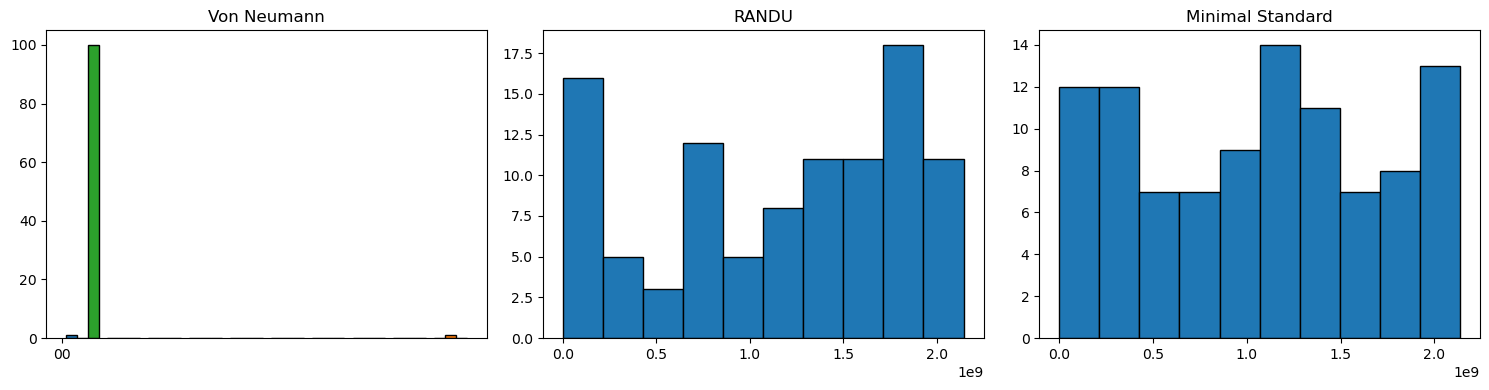

In [19]:
## Donnez votre code ici
def plot_histograms():
    k = 100
    seed = 1
    
    vn = vonNeumann(seed, k)
    rd = randu(seed, k)
    ms = minstd(seed, k)

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.hist(vn, bins=10, edgecolor='black')
    plt.title("Von Neumann")

    plt.subplot(1, 3, 2)
    plt.hist(randu(seed, k), bins=10, edgecolor='black')
    plt.title("RANDU")

    plt.subplot(1, 3, 3)
    plt.hist(minstd(seed, k), bins=10, edgecolor='black')
    plt.title("Minimal Standard")

    plt.tight_layout()
    plt.show()

plot_histograms()


**Commentaires / remarques :** <span style="color:red">Donnez vos commentaires ici</span>

Avec la m√©thode de von Neumann, l‚Äôhistogramme montre une forte concentration des valeurs proches de 0. On observe peu ou pas de valeurs √©lev√©es.

Ce r√©sultat est coh√©rent car le g√©n√©rateur de Von Neumann est tr√®s instable en effet, si une valeur interm√©diaire devient trop petite, le carr√© reste petit et les chiffres centraux deviennent 0 ou tr√®s faibles.
Cela entra√Æne une convergence vers 0, ou un cycle tr√®s court.

On peut donc dire que le g√©n√©rateur de pseudo-al√©atoire est mauvais.


Avec la m√©thode RANDU, l‚Äôhistogramme montre une r√©partition un peu plus vari√©e que Von Neumann, mais avec des trous ou des accumulations.

RANDU est bien meilleur que von Neumann cependant il pr√©sente encore des d√©fault d'accumulation ou d'absence de valeurs.


Avec la m√©thode MINSTD l‚Äôhistogramme montre une r√©partition relativement uniforme.

Le g√©n√©rateur Minimal Standard semble √™tre le plus fiable des trois test√©s ici. Il produit des s√©quences bien distribu√©es, sans convergence ni accumulation apparents.

**Question 9 :** Tracez la valeur obtenue en fonction de la valeur pr√©c√©dente de l‚Äôalgorithme. Plus pr√©cis√©ment, √† partir d‚Äôun vecteur $u$ de taille $n$, ex√©cutez
`plot(u[0:(n-2)], u[1:n-1])`

Commentez.

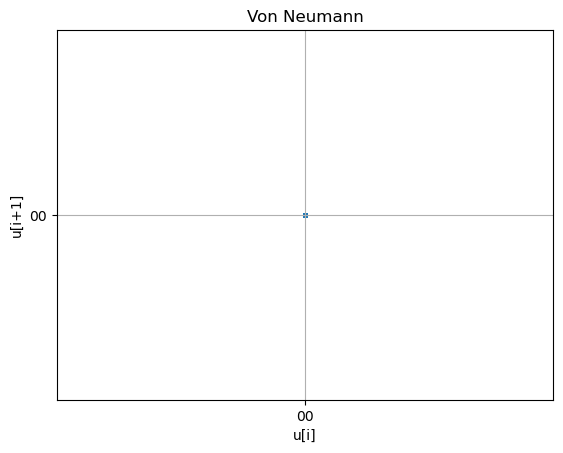

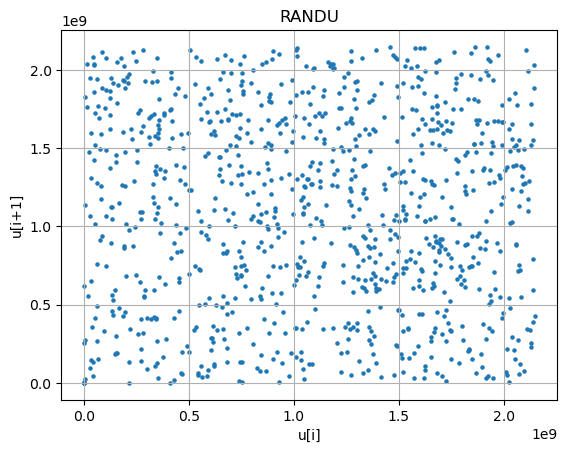

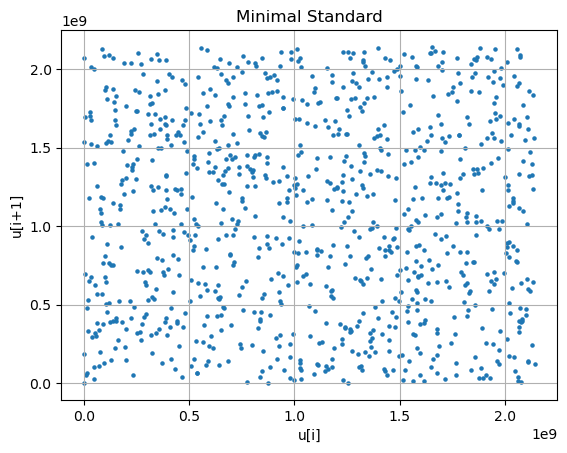

In [20]:
## Donnez votre code ici
def plot_consecutive_values(generator_func, seed, n, title):
    if generator_func == vonNeumann:
        u = generator_func(seed, n)[2]
    else:
        u = generator_func(seed, n)
    plt.scatter(u[:-1], u[1:], s=5)
    plt.title(title)
    plt.xlabel("u[i]")
    plt.ylabel("u[i+1]")
    plt.grid(True)
    plt.show()

# G√©n√©rer et tracer les nuages de points pour chaque g√©n√©rateur
n = 1000
seed = 1

plot_consecutive_values(vonNeumann, seed, n, "Von Neumann")
plot_consecutive_values(randu, seed, n, "RANDU")
plot_consecutive_values(minstd, seed, n, "Minimal Standard")


**Commentaires / remarques :** <span style="color:red">Donnez vos commentaires ici</span>


!!!!!!!!!!! A voir avec les autres pour les points ou les traites (scatter ou plot)

Von Neumann :
Les points sont souvent regroup√©s pr√®s de l‚Äôorigine (0, 0), ou suivent quelques motifs discrets.

Cela refl√®te le fait que les valeurs convergent vers z√©ro ou se r√©p√®tent.

üîπ RANDU :
Les points peuvent appara√Ætre align√©s selon des motifs diagonaux ou des grilles.

Cela illustre les corr√©lations non d√©sir√©es dans les valeurs g√©n√©r√©es.

Ce d√©faut est bien document√© pour RANDU.

üîπ Minimal Standard :
Les points sont plus uniform√©ment r√©partis dans le carr√©

Cela montre un meilleur comportement pseudo-al√©atoire, sans motif √©vident.

### Autres lois

L'objectif de cette section est d'√©tudier comment les diff√©rents ph√©nom√®nes al√©atoires peuvent √™tre simul√©s √† partir de la distribution uniforme sur $[0, 1]$, $U \sim \mathcal{U}_{[0,1]}$. 

Afin de g√©nerer un nombre √† partir de la loi uniforme, nous pouvons nous servir de la fonction
[`random.random()`](https://docs.python.org/3/library/random.html#random.random) ou [`random.uniform(a, b)`](https://docs.python.org/3/library/random.html#random.uniform), o√π $a$ et $b$ sont des bornes d'intervalle sur lequel la variable al√©atoire est d√©finie. 

In [21]:
# nombre pseudo-al√©atoire r√©el de la loi uniforme sur [0, 1) et la loi uniforme
from random import random, uniform

In [22]:
# nombre al√©atoire entre 0 et 1
u1 = random()
print(u1)
u2 = uniform(a=0, b=1)
print(u2)

0.4637183190983307
0.011645333308903494


Nous allons consid√©rer 2 cas : discr√®t et continue.

### Lois discr√®tes

Soit $U \sim \mathcal{U}_{[0,1]}$, $X$ une v.a.r. discr√®te √† valeurs $\{x_1, x_2, ..., x_n\}$ et $\mathbb{P}(X = x_i) = p_i$, $\sum_{i}p_i = 1$.

Afin de simuler la distribution de $X$, nous divisons l'intervalle $[0, 1]$ en sous-intervalles tels que la longeur de sous-intervalle $i$ est $p_i$ :

$$X = \left\{\begin{array}{ll} x_0 & \text{si } U < p_0 \\ 
x_1 & \text{si } p_0 \leq U < p_0 + p_1 \\  
... \\
x_j & \text{si } \sum_{k=0}^{j-1}p_k \leq U < \sum_{k=0}^{j}p_k 
\end{array}\right.$$

Autrement dit :
$$X = x_j \text{ si } F(x_{j-1}) \leq U < F(x_j)$$
o√π $F(x)$ est la fonction de r√©partition de $X$.

$$\mathbb{P}(X=x_j) = \mathbb{P}\left(\sum_{k=0}^{j_1}p_k \leq U < \sum_{k=0}^{j}p_k\right) = p_j$$

#### Loi de Bernoulli

Soit $X$ une v.a.r. discr√®te qui suit la loi de Bernoulli avec le param√®tre $p$, $\mathcal{B}(p)$, e.g. un lancement d'une pi√®ce. Alors, nous pouvons pr√©senter la v.a.r. $X$ somme suit :

$$X = \left\{\begin{array}{ll} 1 & \text{si } U < p \\ 
0 & \text{si } U \geq p\end{array}\right.$$

Alors : 
$$\mathbb{P}(succ√®s) = \mathbb{P}(X = 1) = \mathbb{P}(U < p) = p$$

Notons que dans ce cas-l√†, l'intervalle $[0, 1]$ est divis√© en 2 partie : un de la langueur $p$ et l'autre de longueur $1-p$. La valeur de $X$ est alors d√©finie par la condition dans quelle partie la valeur de $U$ tombe. 

Ecrivez la fonction `bernoulli(p)` qui calcule une valeur de $X$ qui suit la loi de Bernoulli avec le param√®tre $p$.

```
def bernoulli(p=0.5):
    """
    Simulation d'un Bernoulli avec le param√®tre p.
    
    Keyword arguments:
    p -- probabilit√© de succ√®s. Par d√©faut, 0.5 
    
    Return:
    valeur binaire de r√©alisation de la loi de Bernoulli
    """
```

In [23]:
## Donnez votre code ici
def bernoulli(p=0.5):
    nb = random()
    if nb >= p:
        return 0
    else:
        return 1

#### Lancement d'une pi√®ce

Ecrivez une simulation de 1000 lancements d'une pi√®ce √©quilibr√©e et tracer la probabilit√© estim√©e (proportion de nombre de piles) en fonction de nombre de lancements (de 0 jusqu'√† 1000).

```
def coin_toss(nsimu=1000, p=0.5):
    """
    Simulation de nsimu r√©alisation de Bernoulli (lancement d'une pi√®ce) avec le param√®tre p.
    
    
    Keyword arguments:
    nsimu -- nombre de simulations. Par d√©faut, 1000
    p -- probabilit√© de succ√®s. Par d√©faut, 0.5 
    
    Return:
    le nombre cumulative de r√©ussites en commen√ßant avec 0 sur les 1000 runs et la proportion de r√©ussites
    """
```

Afin de calculer le nombre de piles sur $i$ lancement, il est possible de calculer la somme comulative avec `numpy.cumsum()`.

In [24]:
import numpy as np # calculs num√©riques
import matplotlib.pyplot as plt # graphiques

In [25]:
## Donnez votre code ici
def coin_toss(nsimu=1000, p=0.5):
    results = [bernoulli(p) for _ in range(nsimu)]
    cumsum = np.cumsum(results)
    proportions = cumsum / np.arange(1, nsimu + 1)
    return proportions

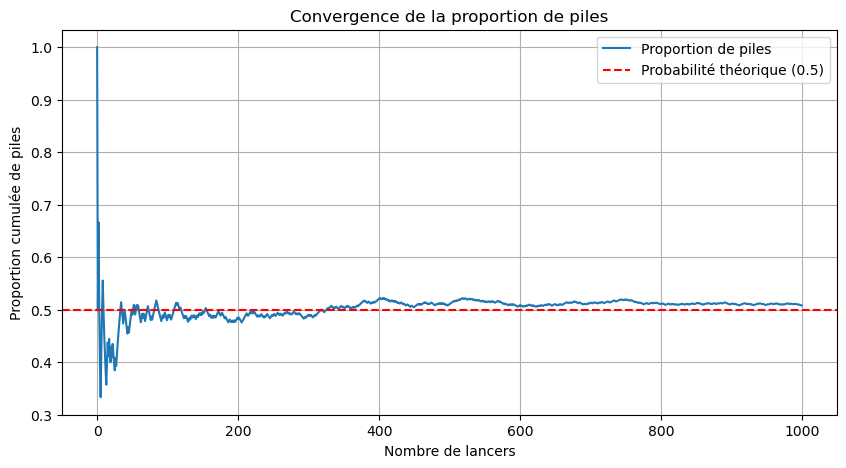

In [26]:
## Donnez votre code ici
# visualisation 
proba_estimee = coin_toss()

plt.figure(figsize=(10, 5))
plt.plot(proba_estimee, label="Proportion de piles")
plt.axhline(0.5, color='red', linestyle='--', label="Probabilit√© th√©orique (0.5)")
plt.xlabel("Nombre de lancers")
plt.ylabel("Proportion cumul√©e de piles")
plt.title("Convergence de la proportion de piles")
plt.legend()
plt.grid(True)
plt.show()

**Conclusions / commentaires :** <span style="color:red">Donnez vos commentaires ici</span>

On observe que la proportion de piles varie beaucoup au d√©but. Cela semble normal, car avec peu de lancers, chaque nouveau r√©sultat a un grand impact sur la moyenne.

√Ä mesure que le nombre de lancers augmente, la courbe devient plus stable.
Elle commence √† se rapprocher de 0.5, la probabilit√© th√©orique d'obtenir pile avec une pi√®ce √©quilibr√©e.

Cela illustre bien la loi des grands nombres, qui dit que plus on r√©p√®te une exp√©rience al√©atoire, plus la fr√©quence relative d‚Äôun √©v√©nement tend vers sa probabilit√© r√©elle.

la ligne horizontale rouge √† p = 0.5 permet bien de comparer visuellement la proportion obsrrv√©e √† la valeur attendue.

### Lois continues : Loi Normale Centr√©e R√©duite

Parmi les lois continues, nous allons nous int√©resser au cas de la loi normale centr√©e r√©duite, $\mathcal{N}(0, 1)$ de la fonction de densit√© $\varphi(z) = \frac{e^{-\frac{z^2}{2}}}{\sqrt{2\pi}}$. 

Dans le but de la simultation, nous allons √©tudier la [m√©thode de Box-Muller](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller) : 

Soient $U_1$ et $U_2$ deux v.a.r. ind√©pendentes qui suivent la loi uniforme. Alors une paire de v.a.r. $Z_1$ et $Z_2$ suivant la loi normale centr√©e r√©duite peut √™tre g√©n√©r√©√© selon la transformation suivante :

$$\left\{ \begin{array}{l} Z_1 = \sqrt{-2 \ln{U_1}} \cos(2\pi U_2) \\ Z_2 = \sqrt{-2 \ln{U_1}} \sin(2\pi U_2) \end{array} \right.$$

Ecrivez la fonction `loi_normale()` qui g√©n√®re 2 v.a.r. qui suivent la loi normale centr√©e r√©duite avec la m√©thode de Box-Muller. 

```
def loi_normale():
    """
    G√©n√®re deux variables al√©atoires suivant la loi normale centr√©e r√©duite avec la m√©thode de Box-Muller.
    
    Return:
    z1, z2 -- deux v.a.r. de la loi normale centr√©e r√©duite
    """
```

Quelques astuces :
- Afin de calculer la racine carr√© de $x$, nous pouvons utiliser la fonction `math.sqrt(x)`
- Afin de calculer log de $x$, nous pouvons utiliser la fonction `math.log(x)`
- Le nombre $\pi$ peut √™tre obtenu comme `math.pi`

In [27]:
import math

In [28]:
## Donnez votre code ici
def loi_normale():
    U1 = random()
    U2 = random()
    z1 = math.sqrt(-2*math.log(U1))*math.cos(2*math.pi*U2)
    z2 = math.sqrt(-2*math.log(U1))*math.sin(2*math.pi*U2)
    return z1, z2

G√©n√©rez 5000 paires de v.a.r. suivant la loi normale centr√©e r√©duite.

In [32]:
## Donnez votre code ici
liste = []
liste_z1 = []
for i in range (5000):
    res = loi_normale()
    liste.append(res)
    liste_z1.append(res[0])

Visualisez les variables $Z_1$ sous forme d'un histogramme. Tracez la courbe de la loi normale centr√©e r√©duite par dessus. Commentez.

Quelques astuces :
- Afin de cr√©er un histogram, nous pouvons utilisez la fonction [`plt.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
- Pour que l'histogramme se base sur la fr√©quence, utilisez l'option `density=True` de `plt.hist()`, e.g. `plt.hist(z1, density=True)`
- Avant de tracer la loi normale centr√©e r√©duite, vous pouvez cr√©er des valeurs √† tracer comme suit :

In [34]:
from scipy.stats import norm # loi normale centr√©e r√©duite
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = norm.pdf(x, mu, sigma) # fonction de densit√© avec les params mu et sigma

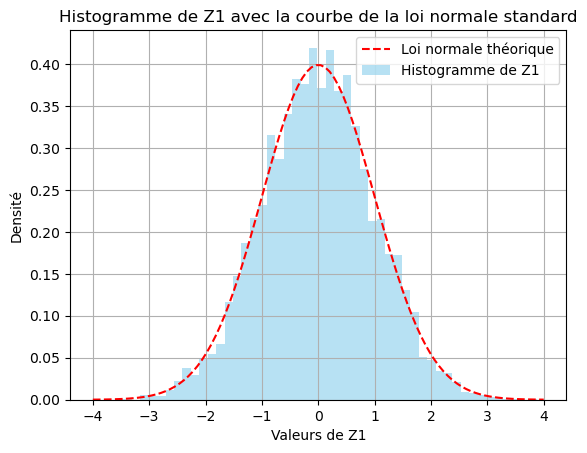

In [35]:
## Donnez votre code ici
# visualisation
plt.plot(x, y, 'r--', label='Loi normale th√©orique')
plt.hist(liste_z1, bins=50, density=True, alpha=0.6, color='skyblue', label='Histogramme de Z1')
plt.title("Histogramme de Z1 avec la courbe de la loi normale standard")
plt.xlabel("Valeurs de Z1")
plt.ylabel("Densit√©")
plt.legend()
plt.grid(True)
plt.show()

**Conclusions / commentaires :** <span style="color:red">Donnez vos commentaires ici</span>

Nous observons que l‚Äôhistogramme pr√©sente une forme en cloche sym√©trique autour de z√©ro ce qui est caract√©ristique d‚Äôune loi normale centr√©e r√©duite. Cela confirme visuellement que les valeurs g√©n√©r√©es par la m√©thode de Box-Muller suivent bien une distribution normale.

La courbe rouge pointill√©e rerp√©sentant la densit√© th√©orique de la loi N(0,1), est tr√®s proche de l‚Äôhistogramme obtenu. Cette bonne superposition montre que la m√©thode g√©n√®re des valeurs conformes √† la loi attendue.


De l√©g√®res irr√©gularit√©s sont visibles dans les extr√©mit√©s de l‚Äôhistogramme, cel√† est normal avec un √©chantillon fini. Elles diminueraient avec un nombre plus √©lev√© de simulations.

Nous pouvons donc affirmer que le test visuel est concluant : la m√©thode de Box-Muller est efficace pour simuler des variables al√©atoires suivant une loi normale standard